In [1]:
import numpy as np
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
%matplotlib inline

import tensorflow
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
import numpy as np
from tensorflow.keras.optimizers import Adam

print(f'Tensorflow version: {tensorflow.__version__}')


Tensorflow version: 2.16.1


Total classes are: 2


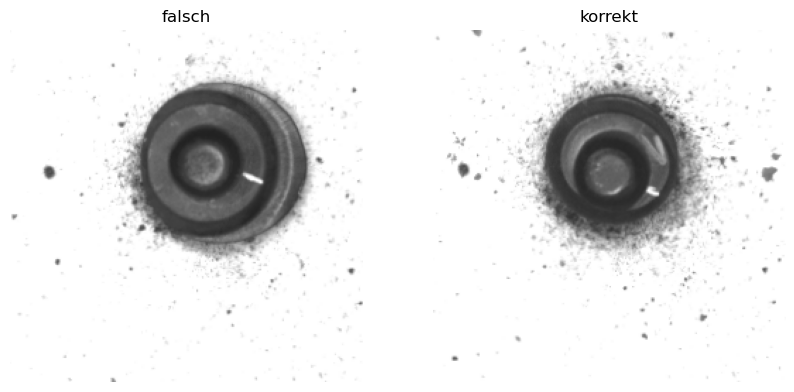

In [2]:
data_folder = "C:\LUH\Master\Masterarbeit\Stereo_camera_program\Daten\Werkzeug_verbaut"

# Get the class names
classes = os.listdir(data_folder)
classes.sort()
print(f'Total classes are: {len(classes)}')

# Show the first image in each folder
fig = plt.figure(figsize=(10,6))
i = 0
for sub_dir in os.listdir(data_folder):
    i+=1
    img_file = os.listdir(os.path.join(data_folder,sub_dir))[0]
    img_path = os.path.join(data_folder, sub_dir, img_file)
    img = mpimg.imread(img_path)
    a = fig.add_subplot(1, len(classes), i)
    a.axis('off')
    imgplot = plt.imshow(img)
    a.set_title(classes[i-1])
plt.show()  


input_shape = (250, 250, 3)  # Assuming 150x150 RGB images
num_classes = 2  # Number of output classes
batch_size = 32
epochs = 10

In [27]:
data_folder

'C:\\LUH\\Master\\Masterarbeit\\Stereo_camera_program\\Daten\\Werkzeug_verbaut'

In [3]:

img_size = (250, 250)
batch_size = 30

print("Getting Data...")
datagen_train = ImageDataGenerator(rescale=1./255, # normalize pixel values
                             validation_split=0.1, # hold back 30% of the images for validation
                             #horizontal_flip=True,
                             #brightness_range=(0.7,1.4)
                             ) 

datagen_valid = ImageDataGenerator(rescale=1./255, # normalize pixel values
                             validation_split=0.1 # hold back 30% of the images for validation
                             ) 

print("Preparing training dataset...")
train_generator = datagen_train.flow_from_directory(
    data_folder,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training') # set as training data

print("Preparing validation dataset...")
validation_generator = datagen_valid.flow_from_directory(
    data_folder,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation') # set as validation data


classnames = list(train_generator.class_indices.keys())
print('Data generators ready')
print(classnames)

Getting Data...
Preparing training dataset...
Found 1238 images belonging to 2 classes.
Preparing validation dataset...
Found 136 images belonging to 2 classes.
Data generators ready
['falsch', 'korrekt']


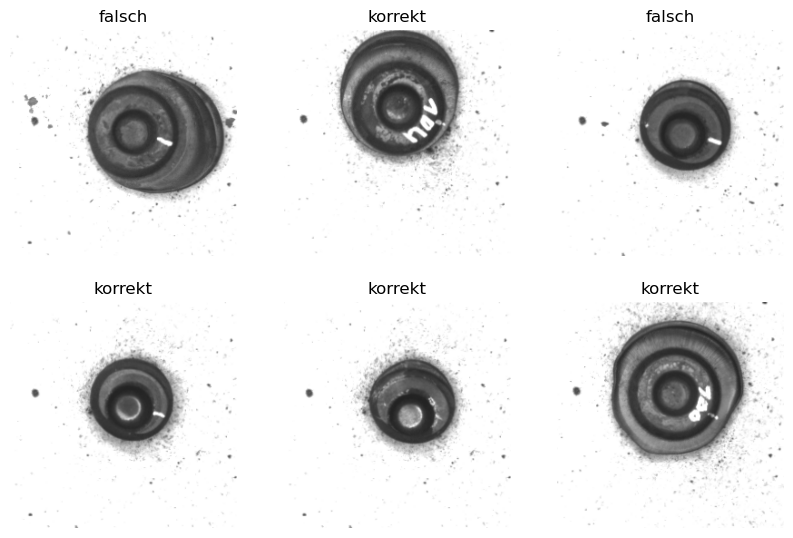

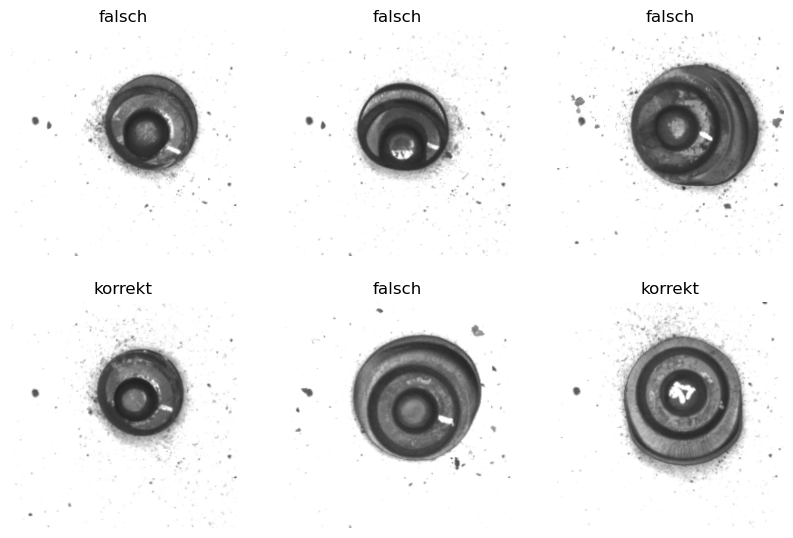

In [4]:
import matplotlib.pyplot as plt

valid_batch_images, valid_batch_labels = next(validation_generator)
train_batch_images, train_batch_labels = next(train_generator)
# Define a function to display images
def show_images(images, labels):
    # Create a grid of 3x3 images
    plt.figure(figsize=(10, 10))
    for i in range(6):
        condition = labels[i] == 1.  
        indices = np.where(condition)
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.title(classnames[int(indices[0])])
        plt.axis('off')  # Hide axis
    plt.show()

# Display the batch of images
show_images(valid_batch_images, valid_batch_labels)
show_images(train_batch_images, train_batch_labels)

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

model.summary()

C:\Users\nikla\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 248, 248, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 124, 124, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 122, 122, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 61, 61, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 59, 59, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 29, 29, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 107648)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 107648)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    13,779,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,872,578 (52.92 MB)

 Trainable params: 13,872,578 (52.92 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='cnn_werk.png')

In [8]:
from tensorflow.keras.callbacks import EarlyStopping

checkpoint_filepath = '/tmp/checkpoint.keras'
model_checkpoint_callback = tensorflow.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='loss',
    mode='min',
    save_best_only=True)

callbacks = [
             #EarlyStopping(patience=2),
             model_checkpoint_callback,
]

num_epochs = 40


history= model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=num_epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size)

Epoch 1/40


C:\Users\nikla\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 41s 909ms/step - accuracy: 0.5058 - loss: 1.3453 - val_accuracy: 0.7000 - val_loss: 0.6435
Epoch 2/40
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7333 - loss: 0.2977 - val_accuracy: 0.6875 - val_loss: 0.3215
Epoch 3/40


d:\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


41/41 ━━━━━━━━━━━━━━━━━━━━ 36s 874ms/step - accuracy: 0.7244 - loss: 0.5528 - val_accuracy: 0.5250 - val_loss: 1.3860
Epoch 4/40
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7000 - loss: 0.3921 - val_accuracy: 0.8750 - val_loss: 0.2241
Epoch 5/40
41/41 ━━━━━━━━━━━━━━━━━━━━ 36s 861ms/step - accuracy: 0.8027 - loss: 0.4203 - val_accuracy: 0.6083 - val_loss: 0.6245
Epoch 6/40
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9667 - loss: 0.0874 - val_accuracy: 0.6250 - val_loss: 0.2369
Epoch 7/40
41/41 ━━━━━━━━━━━━━━━━━━━━ 39s 930ms/step - accuracy: 0.9205 - loss: 0.2220 - val_accuracy: 0.6667 - val_loss: 0.5471
Epoch 8/40
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8667 - loss: 0.1420 - val_accuracy: 0.7500 - val_loss: 0.2093
Epoch 9/40
41/41 ━━━━━━━━━━━━━━━━━━━━ 37s 879ms/step - accuracy: 0.9477 - loss: 0.1418 - val_accuracy: 0.9583 - val_loss: 0.1335
Epoch 10/40
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9667 - loss: 0.0339 - val_accuracy: 0.9375 - val_los

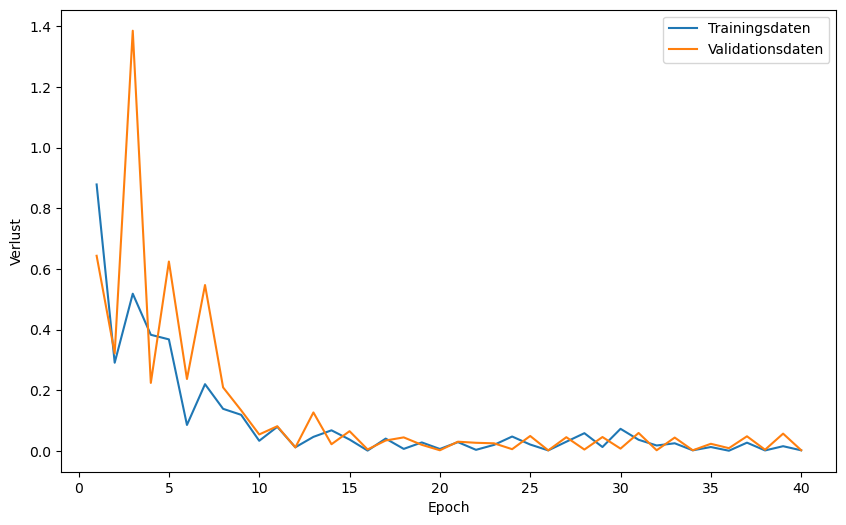

In [10]:


epoch_nums = range(1,num_epochs+1)
training_loss = history.history["loss"]
validation_loss = history.history["val_loss"]
plt.figure(figsize=(10,6))
plt.plot(epoch_nums, training_loss)
plt.plot(epoch_nums, validation_loss)
plt.xlabel('Epoch')
plt.ylabel('Verlust')
plt.legend(['Trainingsdaten ', 'Validationsdaten'], loc='upper right')
plt.show()


In [24]:

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, roc_auc_score
label_encoder = LabelEncoder()

class_probabilities = model.predict(validation_generator)
predictions = np.argmax(class_probabilities, axis=1)
y_true = validation_generator.classes

print(classification_report(y_true, predictions))

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 171ms/step
              precision    recall  f1-score   support

           0       0.52      0.52      0.52        64
           1       0.57      0.57      0.57        72

    accuracy                           0.54       136
   macro avg       0.54      0.54      0.54       136
weighted avg       0.54      0.54      0.54       136



In [35]:
from sklearn.metrics import precision_score, recall_score



class_probabilities = model.predict(validation_generator)
predictions = np.argmax(class_probabilities, axis=1)
y_true = validation_generator.classes

# Calculate precision and recall
precision = precision_score(y_true, predictions.round(), average='weighted')
recall = recall_score(y_true, predictions.round(), average='weighted')
loss, accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
#precision, recall, loss, accuracy 
print(f'Loss: {loss}, Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}' )

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 147ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 172ms/step - accuracy: 0.9878 - loss: 0.0449
Loss: 0.05585600063204765, Accuracy: 0.9833333492279053, Precision: 0.5147058823529411, Recall: 0.5147058823529411


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


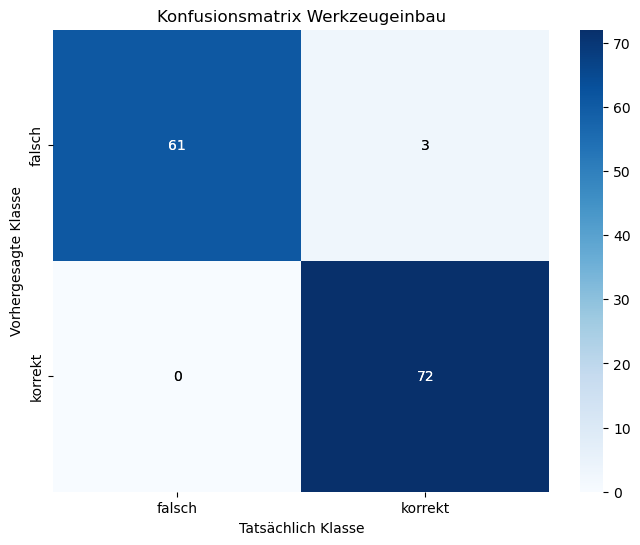

In [9]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize lists to accumulate predictions and true labels
all_predictions = []
all_true_labels = []

# Iterate through the validation generator to collect all data
for i in range(len(validation_generator)):
    x_test = validation_generator[i][0]
    y_test = validation_generator[i][1]
    
    class_probabilities = model.predict(x_test)
    predictions = np.argmax(class_probabilities, axis=1)
    true_labels = np.argmax(y_test, axis=1)
    
    all_predictions.extend(predictions)
    all_true_labels.extend(true_labels)

# Convert lists to numpy arrays
all_true_labels = np.array(all_true_labels)
all_predictions = np.array(all_predictions)

# Calculate confusion matrix
cm = confusion_matrix(all_true_labels, all_predictions)

# Plot the confusion matrix
classnames = ['falsch', 'korrekt']  # Update classnames accordingly
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

# Add counts to plot
colors = ['white', 'black', 'white', 'green']
for i in range(len(cm)):
    for j in range(len(cm)):
        plt.text(j + 0.5, i + 0.5, str(cm[i][j]), ha='center', va='center', color=colors[i + j])

tick_marks = np.arange(len(classnames))
plt.xticks(tick_marks + 0.5, classnames, rotation=0)
plt.yticks(tick_marks + 0.5, classnames)
plt.xlabel("Tatsächlich Klasse")
plt.ylabel("Vorhergesagte Klasse")
plt.title('Konfusionsmatrix Werkzeugeinbau')
plt.show()


In [43]:
class_probabilities = model.predict(train_generator)
predictions = np.argmax(class_probabilities, axis=1)
y_true = train_generator.classes

y_val_labbeled=y_true.copy().astype(str)
x_val_labbeled=predictions.copy().astype(str)

x_val_labbeled[predictions==0]='falsch'
x_val_labbeled[predictions==1]='korrekt'
y_val_labbeled[y_true==0]='falsch'
y_val_labbeled[y_true==1]='korrekt'
y_val_labbeled

42/42 ━━━━━━━━━━━━━━━━━━━━ 7s 158ms/step


array(['falsch', 'falsch', 'falsch', ..., 'korrekt', 'korrekt', 'korrekt'],
      dtype='<U11')

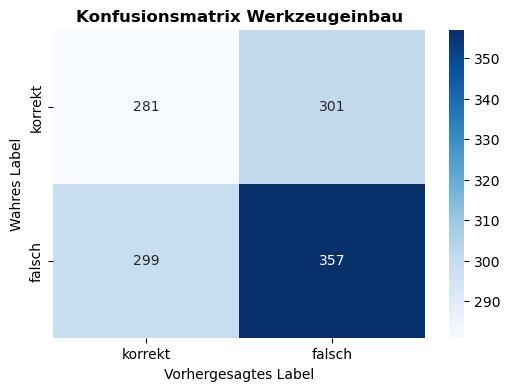

In [44]:
import pandas as pd
import seaborn as sns
conf_matrix = confusion_matrix(y_val_labbeled, x_val_labbeled)
# Example confusion matrix dataframe
conf_matrix_df = pd.DataFrame(conf_matrix, index=['korrekt', 'falsch'], columns=['korrekt', 'falsch'])
# Plot confusion matrix heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_df, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Vorhergesagtes Label')
plt.ylabel('Wahres Label')
plt.title('Konfusionsmatrix Werkzeugeinbau',  fontsize=12, fontweight='bold')
plt.show()

In [ ]:
print("Generating predictions from validation data...")
# Get the image and label arrays for the first batch of validation data
x_test = validation_generator[3][0]
y_test = validation_generator[3][1]

# Use the model to predict the class
class_probabilities = model.predict(validation_generator)

# The model returns a probability value for each class
# The one with the highest probability is the predicted class
predictions = np.argmax(class_probabilities, axis=1)

# The actual labels are hot encoded (e.g. [0 1 0], so get the one with the value 1
true_labels = np.argmax(validation_generator, axis=1)
import seaborn as sns
cm = confusion_matrix(true_labels, predictions)
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

# Add counts to plot
colors=['orange','black', 'orange', 'green']
for i in range(len(cm)):
    for j in range(len(cm)):
        plt.text(j+0.5, i+0.5, str(cm[i][j]), ha='center', va='center', color=colors[i+j])
tick_marks = np.arange(len(classnames))
plt.xticks(tick_marks+0.5, classnames, rotation=85)
plt.yticks(tick_marks+0.5, classnames)
plt.xlabel("Tatsächlich Klasse")
plt.ylabel("Vorhergesagte Klasse")
plt.title('Konfusion Matrix ')
plt.show()

In [30]:


# Save the trained model
modelFileName = 'cnn_werk.keras'
model.save(modelFileName)
#del model  # deletes the existing model variable
print('model saved as', modelFileName) 

model saved as cnn_werk.keras


In [7]:
cnn= tensorflow.keras.models.load_model('cnn_werk.keras')
model=cnn

In [4]:
import cv2


def predict_image(classifier, image):
    from tensorflow import convert_to_tensor
    # The model expects a batch of images as input, so we'll create an array of 1 image
    imgfeatures = img.reshape(1, img.shape[0], img.shape[1], img.shape[2])

    # We need to format the input to match the training data
    # The generator loaded the values as floating point numbers
    # and normalized the pixel values, so...
    imgfeatures = imgfeatures.astype('float32')
    imgfeatures /= 255
    
    # Use the model to predict the image class
    class_probabilities = classifier.predict(imgfeatures)
    
    # Find the class predictions with the highest predicted probability
    index = int(np.argmax(class_probabilities, axis=1)[0])
    return index
class_idx= np.ones(690)
class_idx[class_idx==1]=-1

for i in range(690):
    try:
        img = cv2.imread("C:\LUH\Master\Masterarbeit\Stereo_camera_program\Daten\crop\crop" +str(i+1) + ".png")
    
        class_idx[i] = predict_image(cnn, img)
    except:
        print(i+1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━

In [14]:

len(np.argwhere(class_idx == 1))

688